In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 5046-E6F3

 Directory of C:\Users\Lenovo\Desktop\my proj

29-06-2019  02:43    <DIR>          .
29-06-2019  02:43    <DIR>          ..
29-06-2019  01:25    <DIR>          .ipynb_checkpoints
29-06-2019  02:43           162,733 Lung_Cancer.ipynb
29-06-2019  02:43               789 lung_cancer_examples.csv
               2 File(s)        163,522 bytes
               3 Dir(s)  491,209,596,928 bytes free


In [94]:
lcd=pd.read_csv("lung_cancer_examples.csv")

In [95]:
lcd.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [96]:
lcd.size

295

In [97]:
lcd.columns

Index(['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [98]:
lcd.describe()

## through the desc we can see mean of age  being the biggest factor and then followed by smoking factor

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [99]:
tl=lcd.corr()

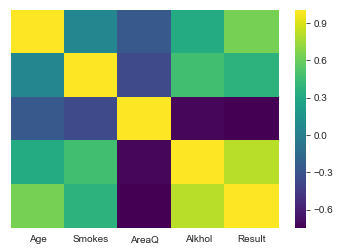

In [100]:
sns.heatmap(tl,yticklabels=False,cmap='viridis')

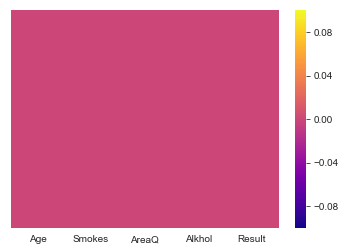

In [101]:
sns.heatmap(lcd.isnull(),yticklabels=False,cmap='plasma')

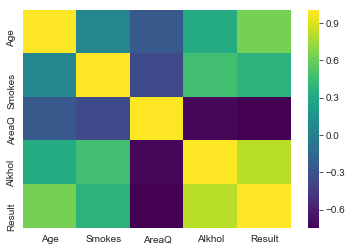

In [102]:
sns.heatmap(tl,yticklabels=True,cmap='viridis')

In [103]:
sns.set_style('whitegrid')

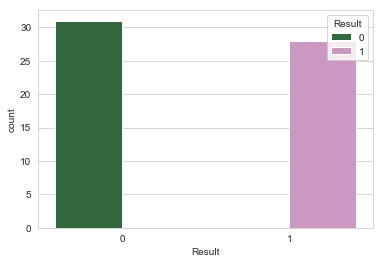

In [104]:
sns.countplot(x="Result",hue="Result",data=lcd,palette='cubehelix')

Text(0, 0.5, 'Age')

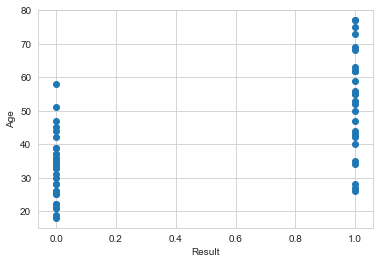

In [105]:
plt.scatter(x="Result",y='Age',data=lcd)
plt.xlabel('Result')
plt.ylabel('Age')

Text(0, 0.5, 'smokes')

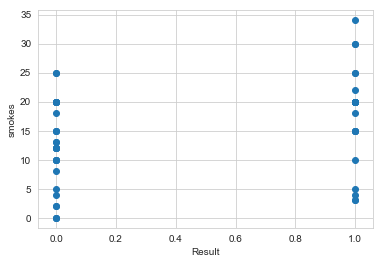

In [106]:
plt.scatter(x="Result",y='Smokes',data=lcd)
plt.xlabel('Result')
plt.ylabel('smokes')

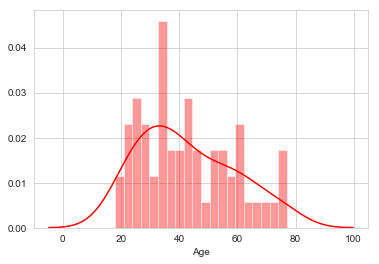

In [107]:
sns.distplot(lcd["Age"],kde=True,color='red',bins=20)

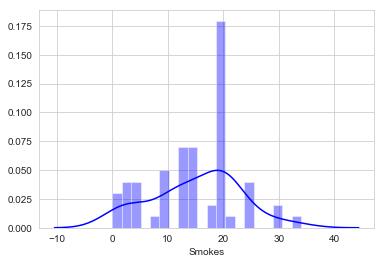

In [108]:
sns.distplot(lcd["Smokes"],kde=True,color='blue',bins=20)

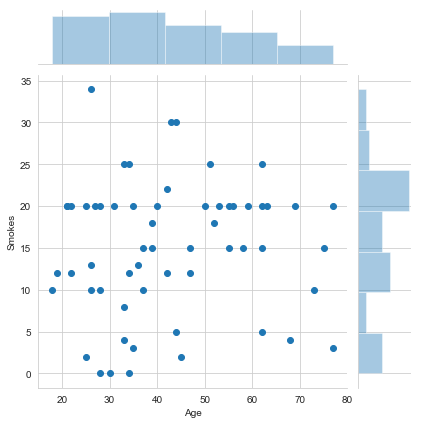

In [109]:
sns.jointplot(x='Age',y='Smokes',data=lcd)

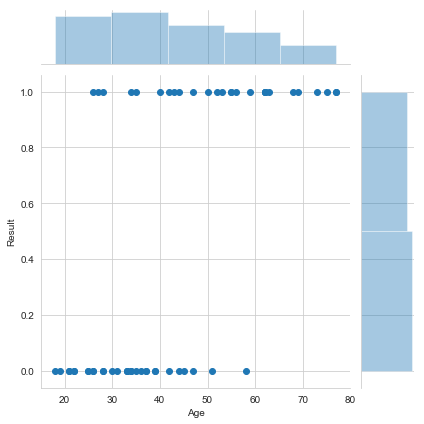

In [110]:
sns.jointplot(x='Age',y='Result',data=lcd)

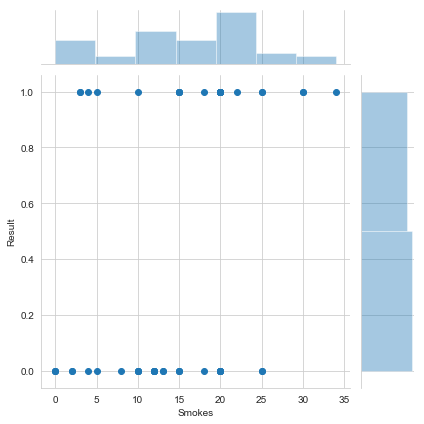

In [111]:
sns.jointplot(x='Smokes',y='Result',data=lcd)

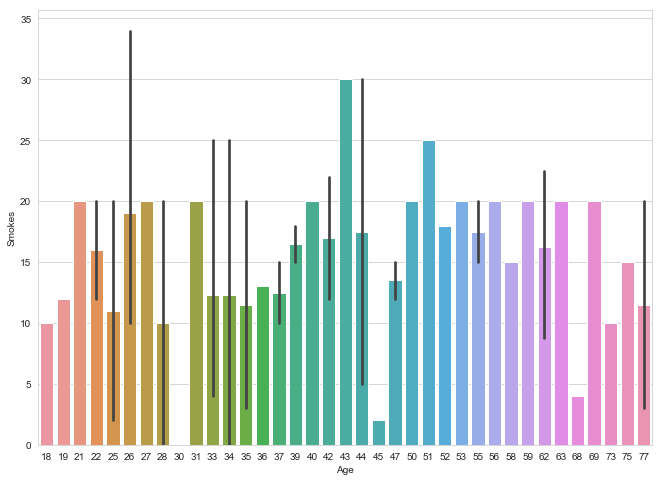

In [112]:
plt.figure(figsize=(11,8))
sns.barplot(x="Age",y="Smokes",data=lcd)

In [113]:
x=['Name','Surname','Age','Smokes','AreaQ','Alkhol','Result']
y=['Prediction']

In [114]:

lcd2=pd.DataFrame(data=lcd)
lcd2.head()


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(lcd.drop('Result',axis=1),lcd['Result'],test_size=.20,random_state=101)


In [117]:
x_test.head()

,Age,Smokes,AreaQ,Alkhol
56,75,15,3,5
22,22,20,6,2
44,39,15,7,2
21,33,8,8,1
25,21,20,5,3


In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
lr=LogisticRegression()

In [120]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [121]:
pred_lcd=lr.predict(x_test)

In [122]:
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
print(classification_report(y_test,pred_lcd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [142]:
x=['Age','Smokes','AreaQ','Alkhol']
data=[34,6,5,4]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Age,Smokes,AreaQ,Alkhol
0,34,6,5,4


In [143]:
pred_lcd=lr.predict(paitentid_54)

In [144]:
print(pred_lcd)

[1]
